In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from sklearn.metrics import accuracy_score, roc_auc_score
from wordcloud import WordCloud



In [27]:
all_predicted_p1 = pd.read_csv('./all_predicted.csv')

In [28]:
def process_df(df):
    df['correct'] += 1
    df['predicted_scores'] = df['predicted_scores'].round().astype(int)
    accuracy = accuracy_score(df['correct'], df['predicted_scores'])
    auc_roc = roc_auc_score(df['correct'], df['predicted_scores'])
    return accuracy, auc_roc

In [29]:
ac, auc = process_df(all_predicted_p1)
print(ac)
print(auc)

0.5508607198748043
0.5661626080125688


In [30]:
direct_predicted_p1 = pd.read_csv('./direct_predicted.csv')
ac, auc = process_df(direct_predicted_p1)
print(ac)
print(auc)

0.5618153364632238
0.549983320905773


In [36]:
all_predicted_p2 = pd.read_csv('./results/all_predicted_2.csv')
ac, auc = process_df(all_predicted_p2)
print(ac)
print(auc)

0.5837245696400626
0.5848733307148468


In [38]:
direct_predicted_p2 = pd.read_csv('./results/direct_predicted_2.csv')
ac, auc = process_df(direct_predicted_p2)
print(ac)
print(auc)

0.568075117370892
0.5672903339743338


In [40]:
feature_1 = pd.read_csv('./results/feature_1.csv')
ac, auc = process_df(feature_1)
print(ac)
print(auc)

0.5743348982785602
0.5759181068342498


In [55]:
feature_2 = pd.read_csv('./results/feature_2.csv')
ac, auc = process_df(feature_2)
print(ac)
print(auc)

0.5805946791862285
0.5786920659858602


In [42]:
feature_2

,op_title,op_text,comment_0,comment_1,correct,predicted_scores,interplay,style,number_of_words,word_choices,word_emotions,entity_related,markdown
0,I believe women are only interested in men for...,I realize I haven't had the best history with ...,"&lt;div class=""md""&gt;&lt;p&gt;It sounds like ...","&lt;div class=""md""&gt;&lt;p&gt;I shall only pr...",1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"CMV: As an environmental engineer, I give up! ...","Greetings I am an environmental engineer, wit...","&lt;div class=""md""&gt;&lt;p&gt;You&amp;#39;ll ...","&lt;div class=""md""&gt;&lt;p&gt;Honestly, I thi...",1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"CMV: I am going on Birthright soon, and I don'...","I am going on a Birthright trip soon, and I am...","&lt;div class=""md""&gt;&lt;p&gt;I&amp;#39;m not...","&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s no...",1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CMV: I think that salesmen are useless middlem...,I think they should be replaced with non-commi...,"&lt;div class=""md""&gt;&lt;p&gt;Let&amp;#39;s f...","&lt;div class=""md""&gt;&lt;p&gt;I work in sales...",1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMV: I believe that falling in love can change...,I believe this generation much too quickly mov...,"&lt;div class=""md""&gt;&lt;p&gt;You know the sa...","&lt;div class=""md""&gt;&lt;p&gt;Simply because ...",1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,CMV: Zoos can be ethical,It goes without say that mistreating zoo anima...,"&lt;div class=""md""&gt;&lt;blockquote&gt; &lt;p...","&lt;div class=""md""&gt;&lt;p&gt;I actually agre...",1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,CMV: Someone who exaggerates their finances or...,*I am not saying that they should be banned fr...,"&lt;div class=""md""&gt;&lt;p&gt;Hiya!&lt;/p&gt;...","&lt;div class=""md""&gt;&lt;p&gt;Scott Walker: H...",1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,CMV: The truth of an idea should matter more t...,What matters most about an idea is whether it ...,"&lt;div class=""md""&gt;&lt;blockquote&gt; &lt;p...","&lt;div class=""md""&gt;&lt;p&gt;Suppose an old ...",2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,CMV: Fear mongers like (The Thinking Mom's Rev...,This people are selling good feelings. Not rea...,"&lt;div class=""md""&gt;&lt;p&gt;You&amp;#39;re ...","&lt;div class=""md""&gt;&lt;p&gt;Over &lt;a href...",2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


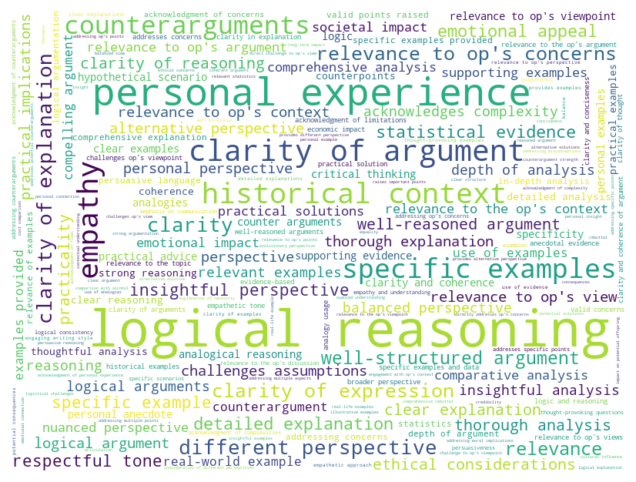

In [53]:
with open('./results/features.txt', 'r') as file:
    lines = file.read().splitlines()
    lines = [line.lower() for line in lines]
    word_count = pd.Series(lines).value_counts()

df_feature = pd.DataFrame(word_count, columns=['Frequency'])

wordcloud = WordCloud(width=800, height=600, mode="RGBA", background_color='white').generate_from_frequencies(word_count)

# Displaying the Word Cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
df_feature.head(20)

,Frequency
logical reasoning,117
personal experience,62
clarity of argument,32
empathy,31
historical context,31
specific examples,28
counterarguments,25
clarity of explanation,15
different perspective,15
clarity,15


In [56]:
feature_2

,op_title,op_text,comment_0,comment_1,correct,predicted_scores,interplay,style,number_of_words,word_choices,word_emotions,entity_related,markdown
0,I believe women are only interested in men for...,I realize I haven't had the best history with ...,"&lt;div class=""md""&gt;&lt;p&gt;It sounds like ...","&lt;div class=""md""&gt;&lt;p&gt;I shall only pr...",1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,"CMV: As an environmental engineer, I give up! ...","Greetings I am an environmental engineer, wit...","&lt;div class=""md""&gt;&lt;p&gt;You&amp;#39;ll ...","&lt;div class=""md""&gt;&lt;p&gt;Honestly, I thi...",1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,"CMV: I am going on Birthright soon, and I don'...","I am going on a Birthright trip soon, and I am...","&lt;div class=""md""&gt;&lt;p&gt;I&amp;#39;m not...","&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s no...",1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,CMV: I think that salesmen are useless middlem...,I think they should be replaced with non-commi...,"&lt;div class=""md""&gt;&lt;p&gt;Let&amp;#39;s f...","&lt;div class=""md""&gt;&lt;p&gt;I work in sales...",1,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,CMV: I believe that falling in love can change...,I believe this generation much too quickly mov...,"&lt;div class=""md""&gt;&lt;p&gt;You know the sa...","&lt;div class=""md""&gt;&lt;p&gt;Simply because ...",1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,CMV: Zoos can be ethical,It goes without say that mistreating zoo anima...,"&lt;div class=""md""&gt;&lt;blockquote&gt; &lt;p...","&lt;div class=""md""&gt;&lt;p&gt;I actually agre...",1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
635,CMV: Someone who exaggerates their finances or...,*I am not saying that they should be banned fr...,"&lt;div class=""md""&gt;&lt;p&gt;Hiya!&lt;/p&gt;...","&lt;div class=""md""&gt;&lt;p&gt;Scott Walker: H...",1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
636,CMV: The truth of an idea should matter more t...,What matters most about an idea is whether it ...,"&lt;div class=""md""&gt;&lt;blockquote&gt; &lt;p...","&lt;div class=""md""&gt;&lt;p&gt;Suppose an old ...",2,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0
637,CMV: Fear mongers like (The Thinking Mom's Rev...,This people are selling good feelings. Not rea...,"&lt;div class=""md""&gt;&lt;p&gt;You&amp;#39;re ...","&lt;div class=""md""&gt;&lt;p&gt;Over &lt;a href...",2,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0


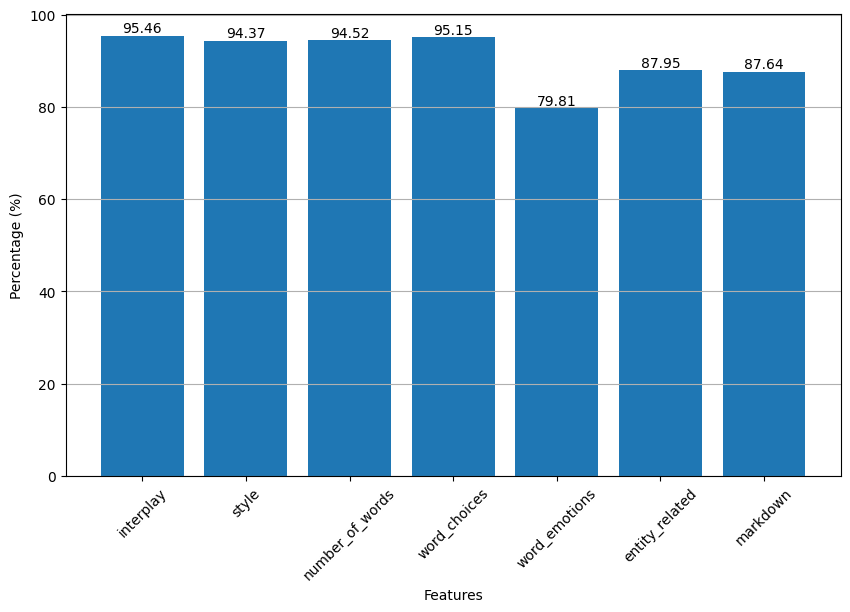

In [58]:
columns_to_analyze = ["interplay", "style", "number_of_words", "word_choices", "word_emotions", "entity_related", "markdown"]

percentages = feature_2[columns_to_analyze].mean() * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(percentages.index, percentages.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [60]:
def calculate_metrics(df, feature_value, feature_name):
    hypothetical_df = df[df[feature_name] == feature_value]
    
    aucroc = roc_auc_score(hypothetical_df['correct'], hypothetical_df['predicted_scores'])
    accuracy = accuracy_score(hypothetical_df['correct'], hypothetical_df['predicted_scores'])
    
    return aucroc, accuracy

# Calculating metrics for 'interplay' = 0 and 1
interplay_0_aucroc, interplay_0_accuracy = calculate_metrics(feature_2, 0, 'interplay')
interplay_1_aucroc, interplay_1_accuracy = calculate_metrics(feature_2, 1, 'interplay')

# Calculating metrics for 'style' = 0 and 1
style_0_aucroc, style_0_accuracy = calculate_metrics(feature_2, 0, 'style')
style_1_aucroc, style_1_accuracy = calculate_metrics(feature_2, 1, 'style')

# Preparing the results in a table format
hypothetical_metrics_results = pd.DataFrame({
    'Feature': ['Interplay = 0', 'Interplay = 1', 'Style = 0', 'Style = 1'],
    'AUC-ROC': [interplay_0_aucroc, interplay_1_aucroc, style_0_aucroc, style_1_aucroc],
    'Accuracy': [interplay_0_accuracy, interplay_1_accuracy, style_0_accuracy, style_1_accuracy]
})

hypothetical_metrics_results


,Feature,AUC-ROC,Accuracy
0,Interplay = 0,0.757143,0.758621
1,Interplay = 1,0.569829,0.572131
2,Style = 0,0.623839,0.638889
3,Style = 1,0.575894,0.577114
